In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
gasturbines = pd.read_csv("gas_turbines.csv")
gasturbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gasturbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gasturbines.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
gasturbines[gasturbines.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [6]:
gasturbines.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

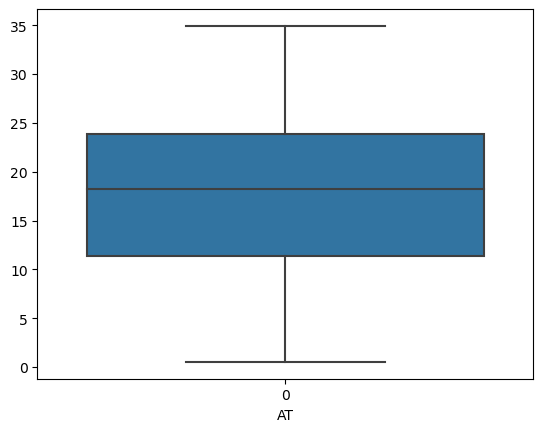

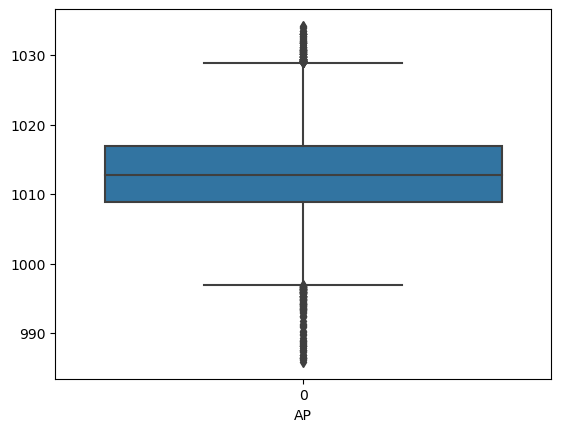

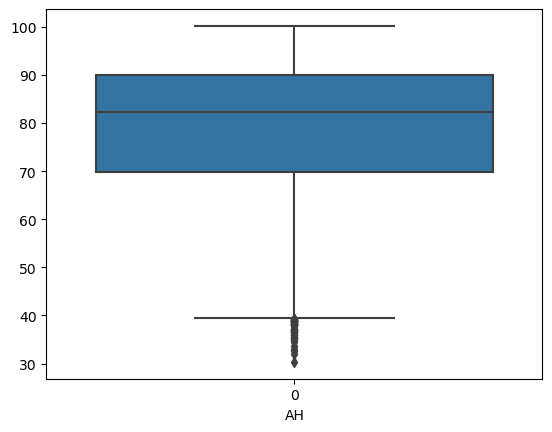

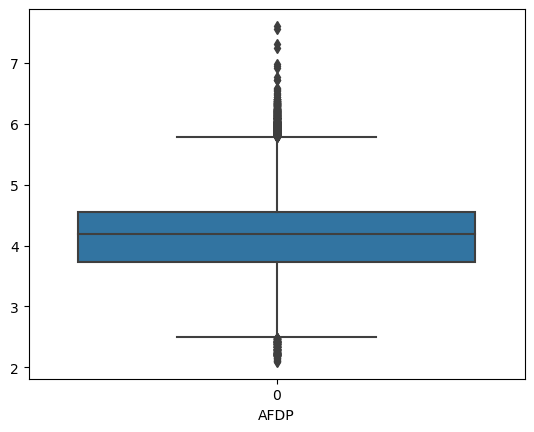

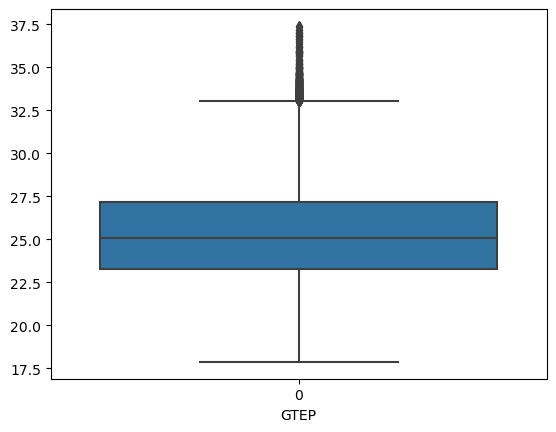

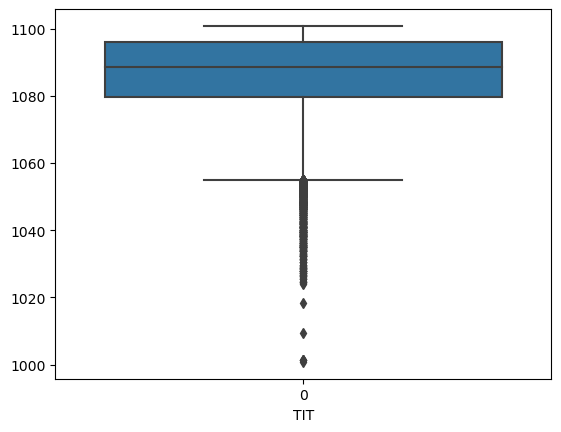

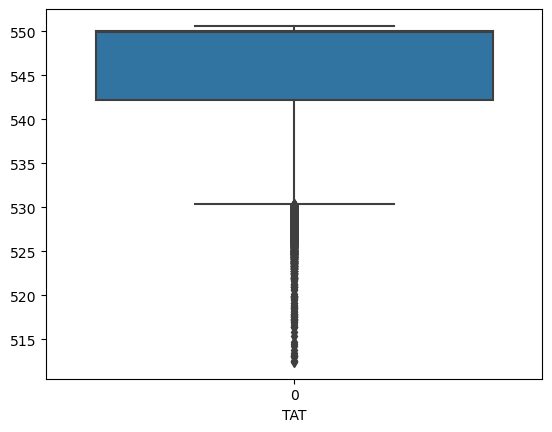

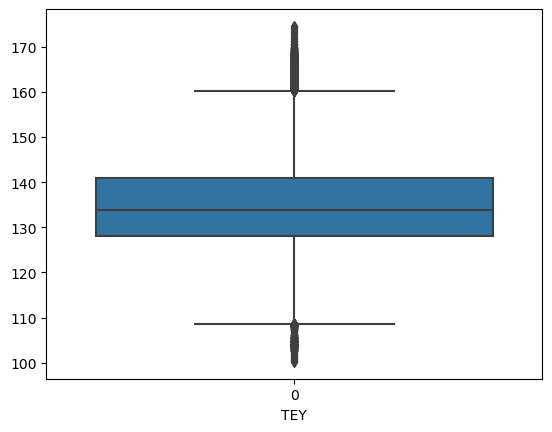

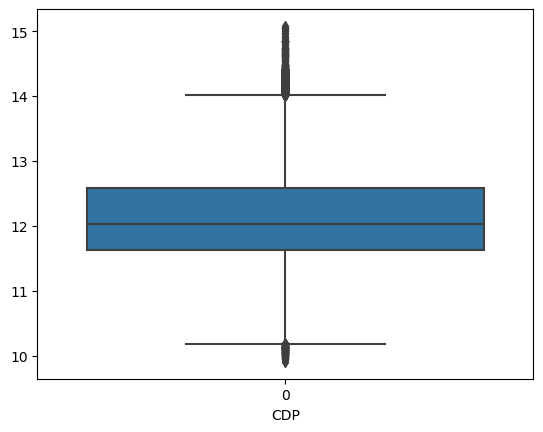

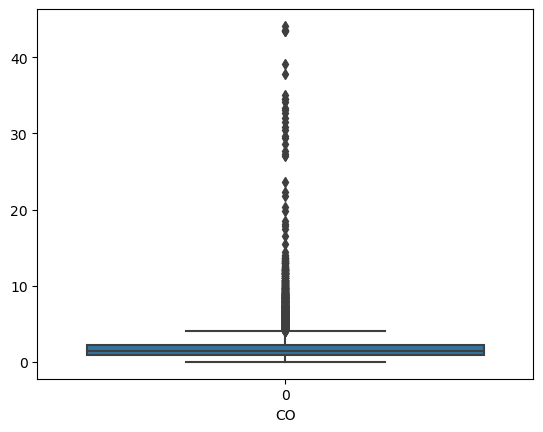

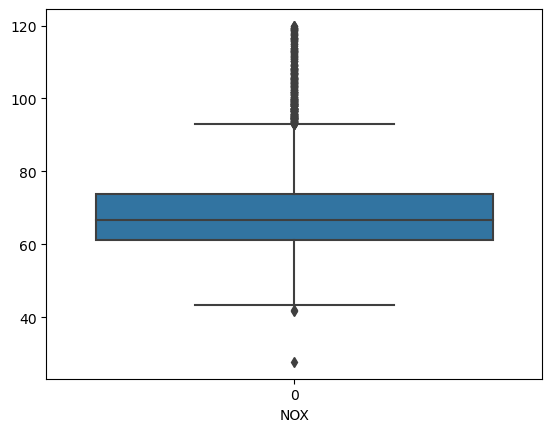

In [7]:
for i in gasturbines.columns:
    sns.boxplot(gasturbines[i])
    plt.xlabel(i)
    plt.show()

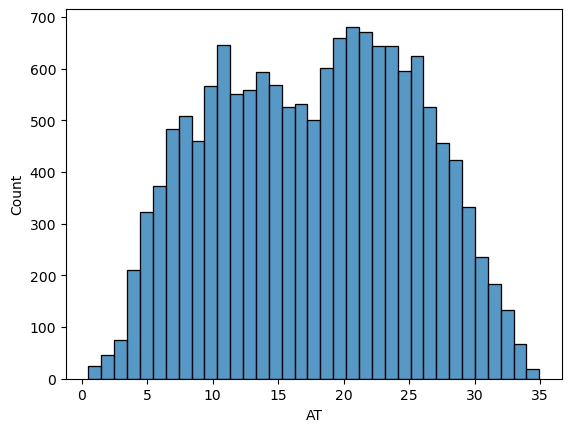

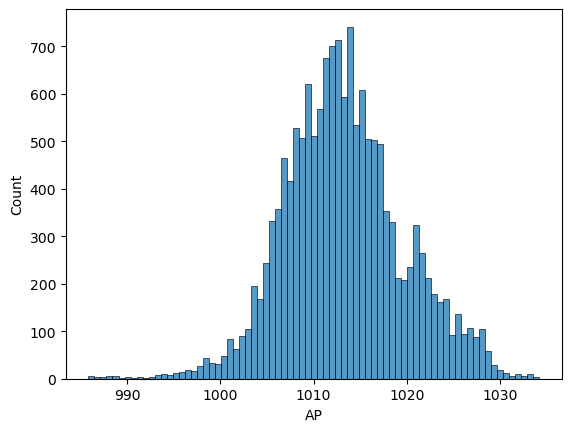

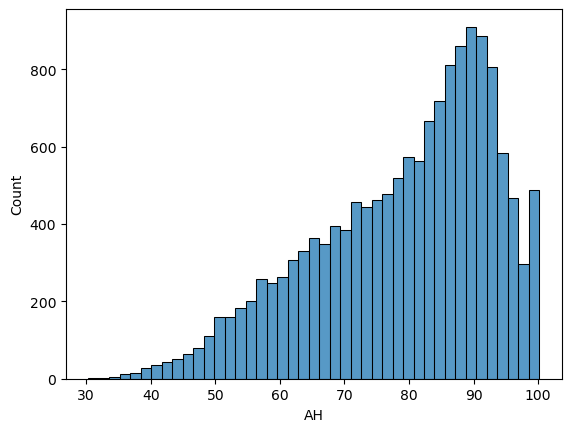

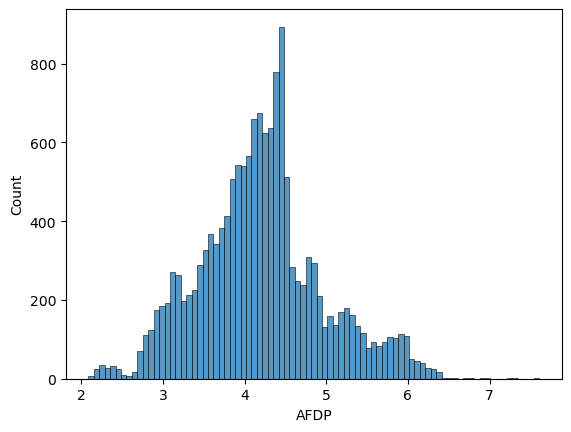

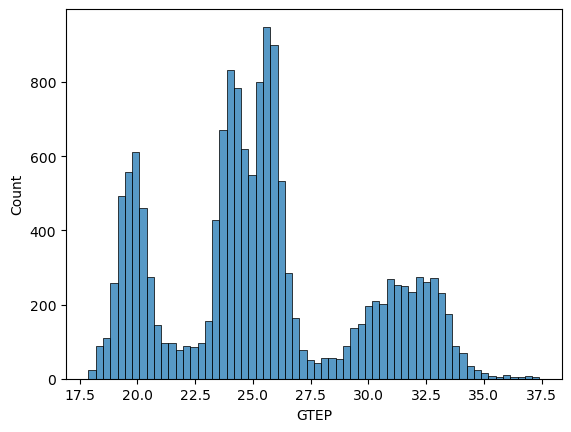

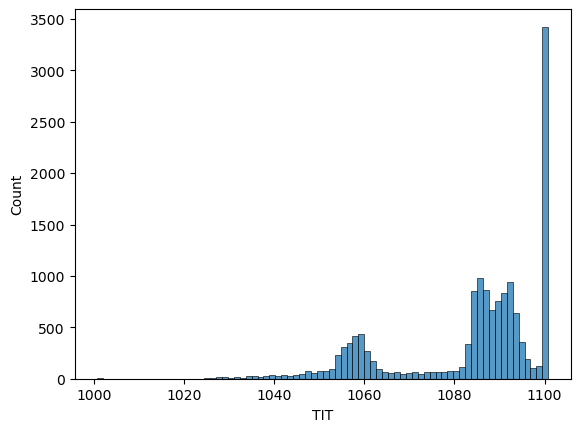

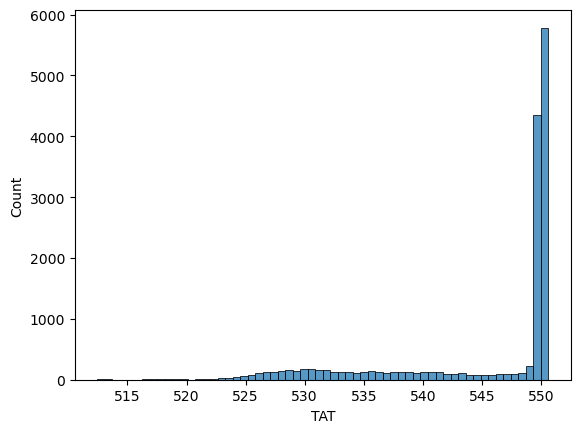

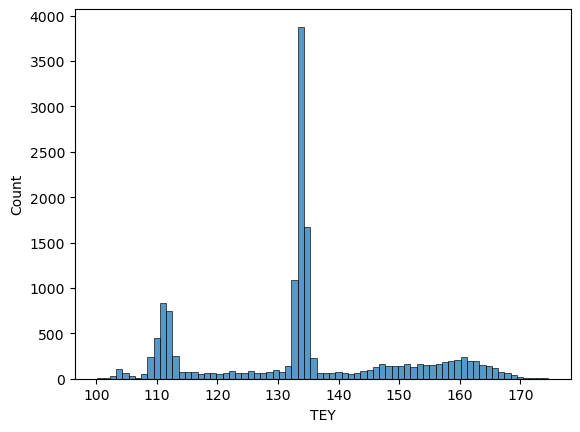

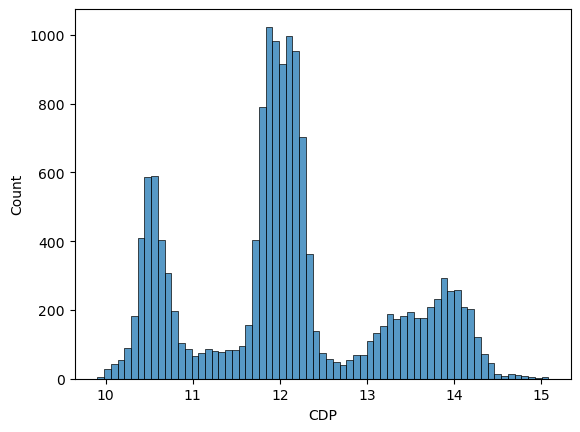

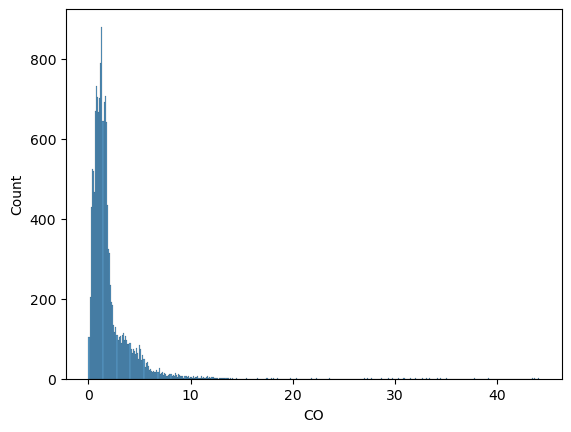

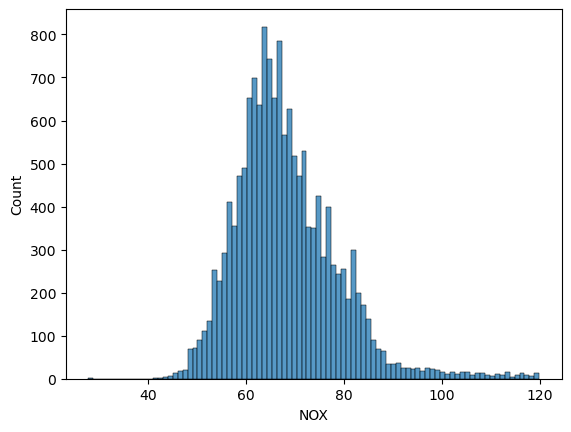

In [8]:
for i in gasturbines.columns:
    sns.histplot(gasturbines[i])
    plt.xlabel(i)
    plt.show()

<Axes: xlabel='TEY', ylabel='Density'>

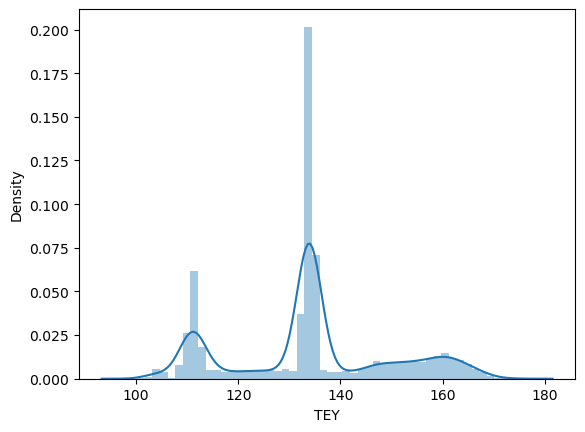

In [9]:
sns.distplot(gasturbines['TEY'])

<Axes: xlabel='TEY', ylabel='Count'>

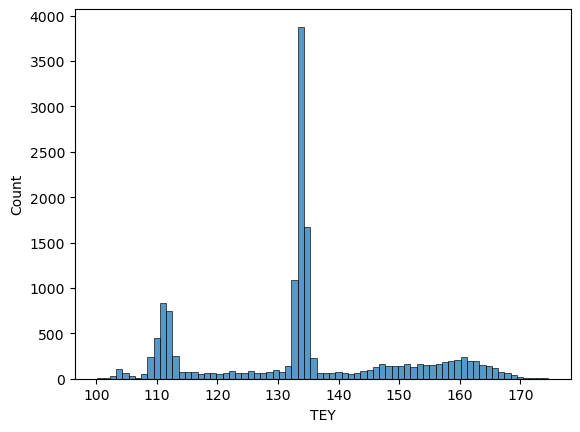

In [10]:
sns.histplot(gasturbines['TEY'])

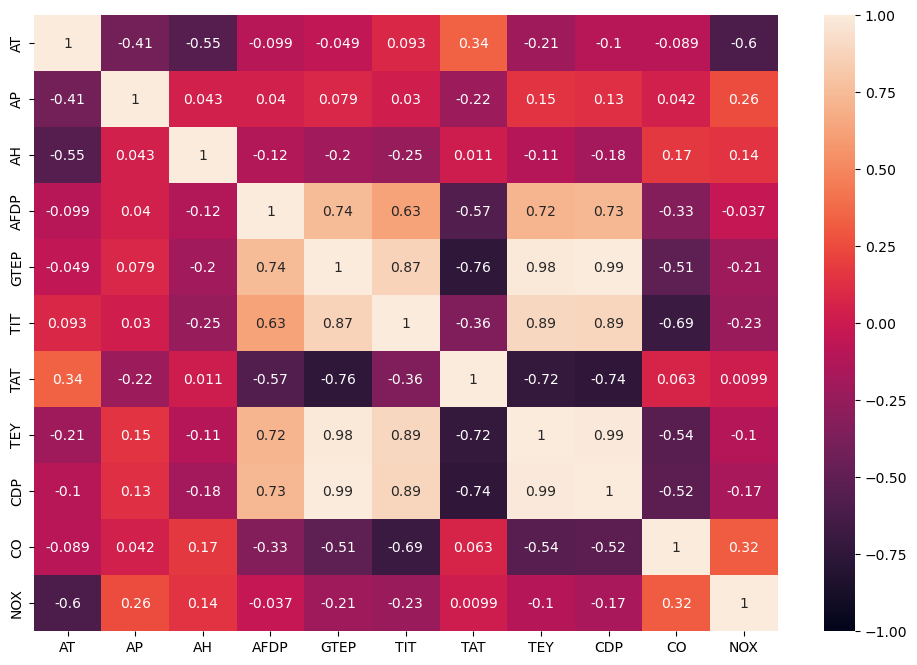

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(gasturbines.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [12]:
x = gasturbines.drop('TEY',axis=1)
y = gasturbines[['TEY']]

In [13]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [14]:
x_std=StandardScaler().fit_transform(x)

In [15]:
x_std

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=3)

In [17]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=10,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='sigmoid')) #4th layer or output layer

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Fit the model
history = model.fit(x_train, y_train, validation_split=0.33, epochs=250, batch_size=20) 

Epoch 1/250


353/353 [==============================] - 1s 2ms/step - loss: -14655.6846 - accuracy: 0.0000e+00 - val_loss: -82201.4766 - val_accuracy: 0.0000e+00
Epoch 2/250
353/353 [==============================] - 0s 1ms/step - loss: -618628.3125 - accuracy: 0.0000e+00 - val_loss: -1641022.5000 - val_accuracy: 0.0000e+00
Epoch 3/250
353/353 [==============================] - 0s 1ms/step - loss: -4297312.0000 - accuracy: 0.0000e+00 - val_loss: -8113705.5000 - val_accuracy: 0.0000e+00
Epoch 4/250
353/353 [==============================] - 0s 1ms/step - loss: -15081769.0000 - accuracy: 0.0000e+00 - val_loss: -23922336.0000 - val_accuracy: 0.0000e+00
Epoch 5/250
353/353 [==============================] - 0s 1ms/step - loss: -37427580.0000 - accuracy: 0.0000e+00 - val_loss: -53482780.0000 - val_accuracy: 0.0000e+00
Epoch 6/250
353/353 [==============================] - 0s 1ms/step - loss: -75914072.0000 - accuracy: 0.0000e+00 - val_loss: -101397512.0000 - val_accuracy: 0.0000e+00
Epoch 

353/353 [==============================] - 0s 1ms/step - loss: -68214857728.0000 - accuracy: 0.0000e+00 - val_loss: -70416097280.0000 - val_accuracy: 0.0000e+00
Epoch 47/250
353/353 [==============================] - 0s 1ms/step - loss: -73203408896.0000 - accuracy: 0.0000e+00 - val_loss: -75513069568.0000 - val_accuracy: 0.0000e+00
Epoch 48/250
353/353 [==============================] - 0s 1ms/step - loss: -78441529344.0000 - accuracy: 0.0000e+00 - val_loss: -80860086272.0000 - val_accuracy: 0.0000e+00
Epoch 49/250
353/353 [==============================] - 0s 1ms/step - loss: -83946430464.0000 - accuracy: 0.0000e+00 - val_loss: -86484566016.0000 - val_accuracy: 0.0000e+00
Epoch 50/250
353/353 [==============================] - 0s 1ms/step - loss: -89726312448.0000 - accuracy: 0.0000e+00 - val_loss: -92378218496.0000 - val_accuracy: 0.0000e+00
Epoch 51/250
353/353 [==============================] - 0s 1ms/step - loss: -95789817856.0000 - accuracy: 0.0000e+00 - val_loss: -98564374528.0

Epoch 93/250
353/353 [==============================] - 0s 1ms/step - loss: -728253661184.0000 - accuracy: 0.0000e+00 - val_loss: -738898870272.0000 - val_accuracy: 0.0000e+00
Epoch 94/250
353/353 [==============================] - 0s 1ms/step - loss: -755644825600.0000 - accuracy: 0.0000e+00 - val_loss: -766571380736.0000 - val_accuracy: 0.0000e+00
Epoch 95/250
353/353 [==============================] - 0s 1ms/step - loss: -783768092672.0000 - accuracy: 0.0000e+00 - val_loss: -794955546624.0000 - val_accuracy: 0.0000e+00
Epoch 96/250
353/353 [==============================] - 0s 1ms/step - loss: -812650135552.0000 - accuracy: 0.0000e+00 - val_loss: -824070045696.0000 - val_accuracy: 0.0000e+00
Epoch 97/250
353/353 [==============================] - 0s 1ms/step - loss: -842332635136.0000 - accuracy: 0.0000e+00 - val_loss: -854038544384.0000 - val_accuracy: 0.0000e+00
Epoch 98/250
353/353 [==============================] - 1s 2ms/step - loss: -872773910528.0000 - accuracy: 0.0000e+00 - 

Epoch 139/250
353/353 [==============================] - 1s 1ms/step - loss: -2974320951296.0000 - accuracy: 0.0000e+00 - val_loss: -2999807377408.0000 - val_accuracy: 0.0000e+00
Epoch 140/250
353/353 [==============================] - 1s 1ms/step - loss: -3050989682688.0000 - accuracy: 0.0000e+00 - val_loss: -3076842061824.0000 - val_accuracy: 0.0000e+00
Epoch 141/250
353/353 [==============================] - 1s 1ms/step - loss: -3129161285632.0000 - accuracy: 0.0000e+00 - val_loss: -3155485523968.0000 - val_accuracy: 0.0000e+00
Epoch 142/250
353/353 [==============================] - 1s 1ms/step - loss: -3208797224960.0000 - accuracy: 0.0000e+00 - val_loss: -3235496329216.0000 - val_accuracy: 0.0000e+00
Epoch 143/250
353/353 [==============================] - 1s 1ms/step - loss: -3289966444544.0000 - accuracy: 0.0000e+00 - val_loss: -3317054308352.0000 - val_accuracy: 0.0000e+00
Epoch 144/250
353/353 [==============================] - 1s 1ms/step - loss: -3372561989632.0000 - accura

Epoch 185/250
353/353 [==============================] - 0s 1ms/step - loss: -8287167709184.0000 - accuracy: 0.0000e+00 - val_loss: -8332216631296.0000 - val_accuracy: 0.0000e+00
Epoch 186/250
353/353 [==============================] - 0s 1ms/step - loss: -8450353397760.0000 - accuracy: 0.0000e+00 - val_loss: -8496029368320.0000 - val_accuracy: 0.0000e+00
Epoch 187/250
353/353 [==============================] - 0s 1ms/step - loss: -8616055668736.0000 - accuracy: 0.0000e+00 - val_loss: -8661938733056.0000 - val_accuracy: 0.0000e+00
Epoch 188/250
353/353 [==============================] - 0s 1ms/step - loss: -8784240443392.0000 - accuracy: 0.0000e+00 - val_loss: -8830707564544.0000 - val_accuracy: 0.0000e+00
Epoch 189/250
353/353 [==============================] - 0s 1ms/step - loss: -8954592624640.0000 - accuracy: 0.0000e+00 - val_loss: -9001317171200.0000 - val_accuracy: 0.0000e+00
Epoch 190/250
353/353 [==============================] - 0s 1ms/step - loss: -9127372783616.0000 - accura

353/353 [==============================] - 1s 1ms/step - loss: -18306991915008.0000 - accuracy: 0.0000e+00 - val_loss: -18371607265280.0000 - val_accuracy: 0.0000e+00
Epoch 231/250
353/353 [==============================] - 1s 1ms/step - loss: -18600163278848.0000 - accuracy: 0.0000e+00 - val_loss: -18665468592128.0000 - val_accuracy: 0.0000e+00
Epoch 232/250
353/353 [==============================] - 0s 1ms/step - loss: -18896937549824.0000 - accuracy: 0.0000e+00 - val_loss: -18962251251712.0000 - val_accuracy: 0.0000e+00
Epoch 233/250
353/353 [==============================] - 0s 1ms/step - loss: -19197195190272.0000 - accuracy: 0.0000e+00 - val_loss: -19263351947264.0000 - val_accuracy: 0.0000e+00
Epoch 234/250
353/353 [==============================] - 0s 1ms/step - loss: -19500866994176.0000 - accuracy: 0.0000e+00 - val_loss: -19566860173312.0000 - val_accuracy: 0.0000e+00
Epoch 235/250
353/353 [==============================] - 0s 1ms/step - loss: -19807835521024.0000 - accuracy:

In [21]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)

329/329 [==============================] - 0s 1ms/step - loss: -25012002095104.0000 - accuracy: 0.0000e+00
['loss', 'accuracy']
accuracy: 0.00%
[-25012002095104.0, 0.0]


In [22]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [23]:
# create model
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [24]:
pd.DataFrame(x_std).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16,1.511894e-16,-7.559468e-17,-3.260021e-15,1.640405e-15,1.965462e-16,3.779734e-17,4.233302e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [25]:

def toFindBestParams(x_train, y_train, x_test, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train, y_train, x_test, y_test)
finalParamTable

141/141 [==============================] - 0s 709us/step
batch_size: 5 - epochs: 5 Accuracy: TEY    95.567095
dtype: float64
141/141 [==============================] - 0s 713us/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.578424
dtype: float64
141/141 [==============================] - 0s 683us/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.685676
dtype: float64
141/141 [==============================] - 0s 795us/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.71018
dtype: float64
141/141 [==============================] - 0s 966us/step
batch_size: 10 - epochs: 5 Accuracy: TEY    73.133285
dtype: float64
141/141 [==============================] - 0s 649us/step
batch_size: 10 - epochs: 10 Accuracy: TEY    96.898195
dtype: float64
141/141 [==============================] - 0s 652us/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.698591
dtype: float64
141/141 [==============================] - 0s 655us/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.723679
dtyp

,batchsize,epochs,Accuracy
0,5,5,TEY 95.567095 dtype: float64
0,5,10,TEY 99.578424 dtype: float64
0,5,50,TEY 99.685676 dtype: float64
0,5,100,TEY 99.71018 dtype: float64
0,10,5,TEY 73.133285 dtype: float64
0,10,10,TEY 96.898195 dtype: float64
0,10,50,TEY 99.698591 dtype: float64
0,10,100,TEY 99.723679 dtype: float64
0,15,5,TEY 52.24911 dtype: float64
0,15,10,TEY 86.728447 dtype: float64


In [26]:
from keras.layers import Dropout
def toFindBestParams(x_train, y_train, x_test, y_test):

    #defining list of hyperparameters
    learning_rate = [0.001]
    dropout_rate = [0.0,0.1,0.2]
    bestParamTable = pd.DataFrame()

    for lr in learning_rate:
        for dr in dropout_rate:
            model = Sequential()
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dropout(dr))
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
            model.add(Dropout(dr))
            model.add(Dense(1, kernel_initializer='normal'))
            adam=Adam(lr=lr)
            model.compile(optimizer =adam, loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=10, epochs=100,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[lr, dr, 100-MAPE]],
                                                        columns=['learning rate','dropout','Accuracy'] ))

            # printing the results of the current iteration
            print('learning rate:', lr,'-', 'dropout:',dr, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train, y_train, x_test, y_test)
finalParamTable

141/141 [==============================] - 0s 1ms/step
learning rate: 0.001 - dropout: 0.0 Accuracy: TEY    99.70147
dtype: float64


141/141 [==============================] - 0s 796us/step


learning rate: 0.001 - dropout: 0.1 Accuracy: TEY    99.291729
dtype: float64
141/141 [==============================] - 0s 786us/step
learning rate: 0.001 - dropout: 0.2 Accuracy: TEY    99.274423
dtype: float64


,learning rate,dropout,Accuracy
0,0.001,0.0,TEY 99.70147 dtype: float64
0,0.001,0.1,TEY 99.291729 dtype: float64
0,0.001,0.2,TEY 99.274423 dtype: float64


In [27]:
#final model
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.0))
model.add(Dense(1, kernel_initializer='normal'))
adam=Adam(0.001)
model.compile(optimizer =adam, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(x_train, y_train , batch_size=5, epochs=100,  verbose=0)

In [28]:
y_pred = model.predict(x_test)

141/141 [==============================] - 0s 1ms/step


In [29]:
y_pred

array([[163.59404],
       [133.64624],
       [163.33127],
       ...,
       [111.82052],
       [109.6814 ],
       [133.7228 ]], dtype=float32)

In [30]:
y_test

,TEY
8185,164.34
8994,133.67
8944,163.41
3451,109.78
8236,135.01
...,...
4964,133.78
9159,137.00
12903,111.53
6025,109.77


In [31]:
Y_pred=model.predict(x_train)

329/329 [==============================] - 0s 899us/step


In [32]:
Y_pred

array([[136.30708],
       [134.03433],
       [133.91592],
       ...,
       [133.36412],
       [141.62659],
       [134.41058]], dtype=float32)

In [33]:
y_train

,TEY
13383,135.92
13172,133.87
8356,133.66
2683,154.48
3266,133.82
...,...
9160,155.62
9859,156.74
11513,133.70
1688,142.06


In [35]:
y_pred=model.predict(x_std)

470/470 [==============================] - 0s 863us/step


In [36]:
y_pred

array([[115.33169 ],
       [115.43616 ],
       [115.59275 ],
       ...,
       [110.78118 ],
       [111.767815],
       [112.54389 ]], dtype=float32)

In [37]:
gasturbines['predicted']=y_pred
gasturbines['actual']=gasturbines['TEY']

In [38]:
gasturbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,predicted,actual
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,115.331688,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,115.436157,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,115.592751,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,115.576622,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,115.555908,114.72


In [39]:
gasturbines['error']=gasturbines['predicted']-gasturbines['actual']
gasturbines['error']

0        0.631688
1        0.716157
2        0.882751
3        0.856622
4        0.835908
           ...   
15034    0.130112
15035    0.261016
15036    0.591181
15037    1.027815
15038    0.963892
Name: error, Length: 15039, dtype: float64

In [40]:
gasturbines.to_csv("gasTurbine_modelOutPut.csv")

In [41]:
gasturbines.error.mean()

-0.005940939015915387

In [42]:
gasturbines.error.std()

0.4735619147215264

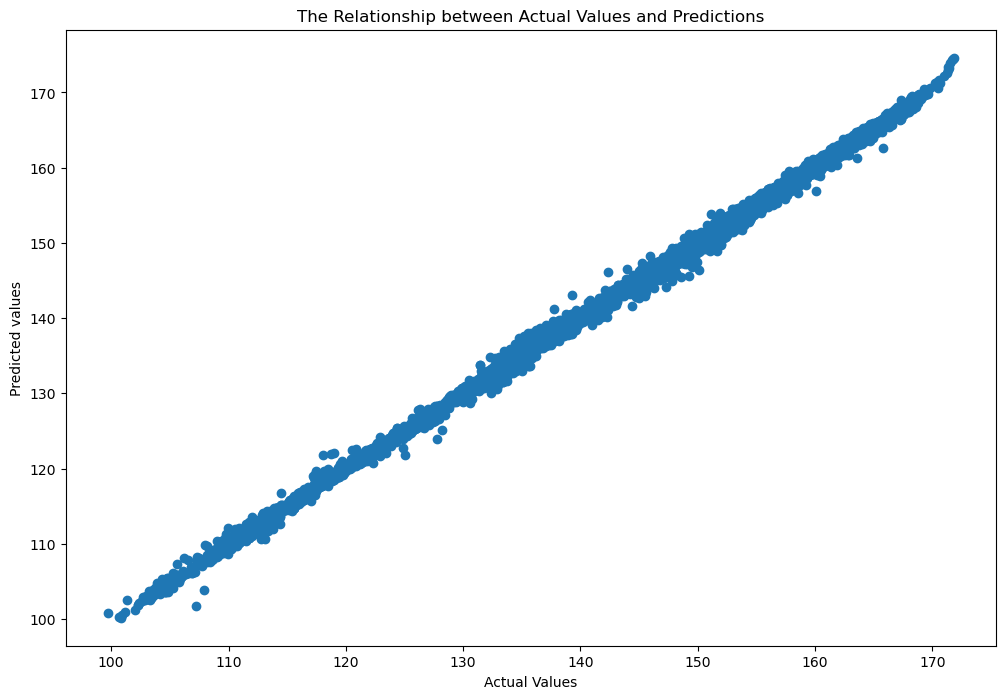

In [43]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Relationship between Actual Values and Predictions")
plt.scatter(gasturbines['predicted'],gasturbines['actual'])